In [1]:
! pwd

/Users/alex/Desktop/ASTR100-2020/Students/AlexanderMcPike


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from astropy.io import fits
from astropy.stats import sigma_clipped_stats

In [18]:
! ls ../../Data/2017.0316
working_dir = "../../Data/2017.0316"

os.chdir(working_dir)

0001.BIAS.fits            0028.KH15D.fits           0055.BIAS.fits
0002.BIAS.fits            0029.KH15D.fits           0056.AT2017cfb.fits
0003.BIAS.fits            0030.NGC2264.fits         0057.AT2017cfb.fits
0004.BIAS.fits            0031.NGC2264.fits         0058.AT2017cfb.fits
0005.BIAS.fits            0032.NGC2264.fits         0059.COMP.fits
0006.BIAS.fits            0033.COMP.fits            0060.AT2017cfc.fits
0007.BIAS.fits            0034.NGC2244.fits         0061.AT2017cfc.fits
0008.BIAS.fits            0035.NGC2244.fits         0062.AT2017cfc.fits
0009.BIAS.fits            0036.NGC2392.fits         0063.COMP.fits
0010.BIAS.fits            0037.AT2017cfa.fits       0064.BHvsNova.fits
0011.FLAT.fits            0038.AT2017cfa.fits       0065.BHvsNova.fits
0012.FLAT.fits            0039.AT2017cfa.fits       0066.BHvsNova.fits
0013.FLAT.fits            0040.COMP.fits            0067.COMP.fits
0014.FLAT.fits            0041.AT2017cel.fits       0068.AT2017cfc.fits
0015.FLAT.fits 

In [19]:
glob.glob("*") #takes in files from whatever directory and returns a list of these files in random 

['0064.BHvsNova.fits',
 '0041.AT2017cel.fits',
 '0071.Jupiter.fits',
 '0022.FLAT.fits',
 '0017.FLAT.fits',
 '0044.APM08279.fits',
 '0002.BIAS.fits',
 '0011.FLAT.fits',
 '0009.BIAS.fits',
 '0048.Adhafera.fits',
 '0062.AT2017cfc.fits',
 '0024.FLAT.fits',
 '0070.Jupiter.fits',
 '0051.Phecda.fits',
 '0010.BIAS.fits',
 '0047.NGC2392slitless.fits',
 '0004.BIAS.fits',
 'fastlog.log',
 '0074.M3.fits',
 '0023.FLAT.fits',
 '0055.BIAS.fits',
 '0067.COMP.fits',
 '0016.FLAT.fits',
 '0042.AT2017cel.fits',
 '0052.COMP.fits',
 '0050.total 0.5.fits',
 '0039.AT2017cfa.fits',
 '0068.AT2017cfc.fits',
 '0003.BIAS.fits',
 '0034.NGC2244.fits',
 '0060.AT2017cfc.fits',
 '0040.COMP.fits',
 '0008.BIAS.fits',
 '0046.NGC2392slitless.fits',
 '0076.2017bkc.fits',
 '0061.AT2017cfc.fits',
 '0054.COMP.fits',
 '0025.FLAT.fits',
 '0038.AT2017cfa.fits',
 '0029.KH15D.fits',
 '0053.BIAS.fits',
 '0032.NGC2264.fits',
 'fastlog.dvi',
 '0035.NGC2244.fits',
 '0005.BIAS.fits',
 '0037.AT2017cfa.fits',
 '0059.COMP.fits',
 'fastlog.

In [20]:
files_ALL = sorted(glob.glob("*fits"))
files_BIAS = sorted(glob.glob("*BIAS*fits"))
files_FLATS = sorted(glob.glob("*FLATS*fits"))
files_ARCS = sorted(glob.glob("*COMP*fits"))
files_IMAGES = sorted(list(set(files_ALL) - set(files_BIAS) - set(files_FLATS) - set(files_ARCS)))
files_IMAGES

['0011.FLAT.fits',
 '0012.FLAT.fits',
 '0013.FLAT.fits',
 '0014.FLAT.fits',
 '0015.FLAT.fits',
 '0016.FLAT.fits',
 '0017.FLAT.fits',
 '0018.FLAT.fits',
 '0019.FLAT.fits',
 '0020.FLAT.fits',
 '0021.FLAT.fits',
 '0022.FLAT.fits',
 '0023.FLAT.fits',
 '0024.FLAT.fits',
 '0025.FLAT.fits',
 '0027.KH15D.fits',
 '0028.KH15D.fits',
 '0029.KH15D.fits',
 '0030.NGC2264.fits',
 '0031.NGC2264.fits',
 '0032.NGC2264.fits',
 '0034.NGC2244.fits',
 '0035.NGC2244.fits',
 '0036.NGC2392.fits',
 '0037.AT2017cfa.fits',
 '0038.AT2017cfa.fits',
 '0039.AT2017cfa.fits',
 '0041.AT2017cel.fits',
 '0042.AT2017cel.fits',
 '0044.APM08279.fits',
 '0046.NGC2392slitless.fits',
 '0047.NGC2392slitless.fits',
 '0048.Adhafera.fits',
 '0050.total 0.5.fits',
 '0051.Phecda.fits',
 '0056.AT2017cfb.fits',
 '0057.AT2017cfb.fits',
 '0058.AT2017cfb.fits',
 '0060.AT2017cfc.fits',
 '0061.AT2017cfc.fits',
 '0062.AT2017cfc.fits',
 '0064.BHvsNova.fits',
 '0065.BHvsNova.fits',
 '0066.BHvsNova.fits',
 '0068.AT2017cfc.fits',
 '0070.Jupiter.

In [21]:
print(files_ALL)
print(files_BIAS)
print(files_FLATS)
print(files_ARCS)

['0001.BIAS.fits', '0002.BIAS.fits', '0003.BIAS.fits', '0004.BIAS.fits', '0005.BIAS.fits', '0006.BIAS.fits', '0007.BIAS.fits', '0008.BIAS.fits', '0009.BIAS.fits', '0010.BIAS.fits', '0011.FLAT.fits', '0012.FLAT.fits', '0013.FLAT.fits', '0014.FLAT.fits', '0015.FLAT.fits', '0016.FLAT.fits', '0017.FLAT.fits', '0018.FLAT.fits', '0019.FLAT.fits', '0020.FLAT.fits', '0021.FLAT.fits', '0022.FLAT.fits', '0023.FLAT.fits', '0024.FLAT.fits', '0025.FLAT.fits', '0026.COMP.fits', '0027.KH15D.fits', '0028.KH15D.fits', '0029.KH15D.fits', '0030.NGC2264.fits', '0031.NGC2264.fits', '0032.NGC2264.fits', '0033.COMP.fits', '0034.NGC2244.fits', '0035.NGC2244.fits', '0036.NGC2392.fits', '0037.AT2017cfa.fits', '0038.AT2017cfa.fits', '0039.AT2017cfa.fits', '0040.COMP.fits', '0041.AT2017cel.fits', '0042.AT2017cel.fits', '0043.COMP.fits', '0044.APM08279.fits', '0045.COMP.fits', '0046.NGC2392slitless.fits', '0047.NGC2392slitless.fits', '0048.Adhafera.fits', '0049.COMP.fits', '0050.total 0.5.fits', '0051.Phecda.fits'

Filename: 0001.BIAS.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   (2720, 161)   int16 (rescales to uint16)   


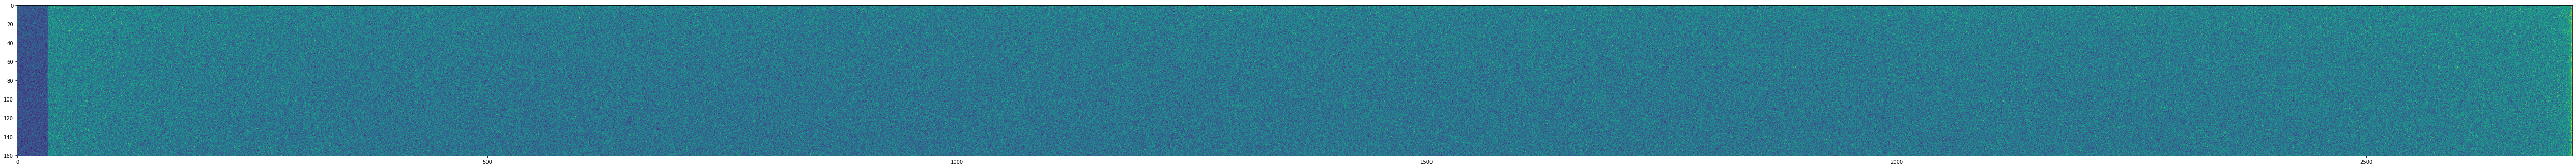

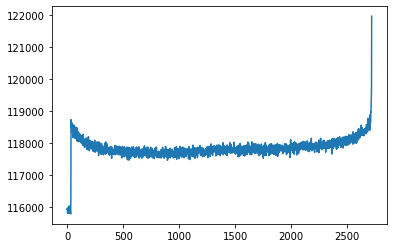

In [34]:
HDUList = fits.open(files_BIAS[0])
HDUList.info()

header = HDUList[0].header
data = HDUList[0].data

plt.figure(figsize=(90, 7))
plt.imshow(data)

plt.show()

plt.plot(np.sum(data, axis=0))

In [28]:
header

 [astropy.io.fits.verify]


SIMPLE  =                    T / Primary FITS image array                       
BITPIX  =                   16                                                  
NAXIS   =                    2 / NUMBER OF AXES                                 
NAXIS1  =                 2720 / CHIP WIDTH                                     
NAXIS2  =                  161 / CHIP HEIGHT                                    
EXTEND  =                    F / Fits standard                                  
OBJECT  = 'BIAS              ' / OBJECT NAME                                    
NAMPS   =                    1                                                  
DATE    = '2017-03-17T01:48:23' / UT date/time at start                         
DATE-OBS= '2017-03-17        ' / UT date/time at start                          
RA      = '13:18:53          ' / RA                                             
DEC     = '-06:38:33         ' / DEC                                            
EPOCH   = '2000             